# Wikidata Triplets Extraction

In [1]:
import seaborn as sns
from wikidata_extractor import WikidataExtractor

## Triplet Extraction

In [2]:
extractor = WikidataExtractor("../../data/wikidata/latest-all.json.bz2")
extraction = extractor.extract_with_generator()

Processing lines: 9000line [01:09, 128.82line/s] 


In [3]:
extractor.slots_counter

{'P1595': 5,
 'P1038': 333,
 'P3373': 333,
 'P22': 333,
 'P25': 333,
 'P40': 333,
 'P26': 333,
 'P140': 333,
 'P108': 333,
 'P463': 333,
 'P97': 333,
 'P69': 333,
 'P551': 333,
 'P27': 333,
 'P509': 333,
 'P20': 333,
 'P570': 333,
 'P19': 333,
 'P569': 333,
 'P4970': 8,
 'P856': 333,
 'P127': 333,
 'P159': 333,
 'P576': 333,
 'P571': 333,
 'P112': 333,
 'P749': 333,
 'P355': 333,
 'P1128': 329,
 'P1129': 0}

In [4]:
extraction

,q_id,q_name,p_id,p_name,p_value,p_value_type
0,Q31,Belgium,P571,inception,"October 04, 1830 at 12:00:00 AM CE UTC",time
1,Q31,Belgium,P856,official_website,https://www.belgium.be/,url
2,Q31,Belgium,P463,member_of,Q458,wikibase-item
3,Q23,George Washington,P509,cause_of_death,Q1347065,wikibase-item
4,Q23,George Washington,P20,place_of_death,Q731635,wikibase-item
...,...,...,...,...,...,...
8995,Q653440,New Mexico Junior College,P1128,number_of_employees,345.0,quantity
8996,Q655286,Bill & Melinda Gates Foundation,P1128,number_of_employees,1603.0,quantity
8997,Q655966,Comarch,P1128,number_of_employees,6349.0,quantity
8998,Q657629,Palazzo Davanzati,P1128,number_of_employees,13.0,quantity


## Data Visualization

In [9]:
# Obtain all the possible p_value_types
p_value_types = set()

for index_row, row in extraction.iterrows():
    p_value_types.add(row["p_value_type"])

p_value_types

{'quantity', 'string', 'time', 'url', 'wikibase-item'}

Text(0.5, 1.0, 'Frequency of each p-value type')

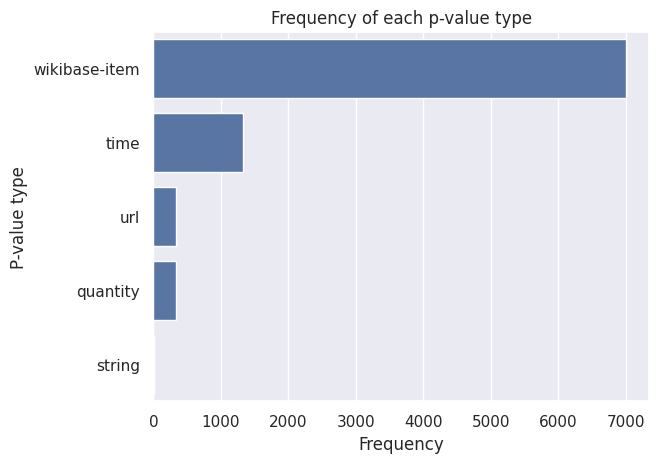

In [10]:
# Plot the frrquency of each p_value_type
sns.set_theme(style="darkgrid")
ax = sns.countplot(
    y="p_value_type",
    data=extraction,
    order=extraction["p_value_type"].value_counts().index,
)
ax.set(xlabel="Frequency", ylabel="P-value type")
ax.set_title("Frequency of each p-value type")

<Axes: xlabel='count', ylabel='p_name'>

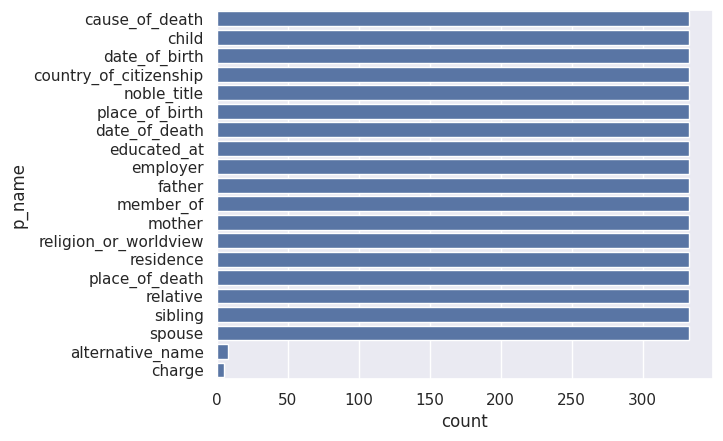

In [7]:
# Plot the distribution of p_names regarding person slots
person_slots_dict = {
    "charge": "P1595",
    "relative": "P1038",
    "sibling": "P3373",
    "father": "P22",
    "mother": "P25",
    "child": "P40",
    "spouse": "P26",
    "religion_or_worldview": "P140",
    "employer": "P108",
    "member_of": "P463",
    "noble_title": "P97",
    "educated_at": "P69",
    "residence": "P551",
    "country_of_citizenship": "P27",
    "cause_of_death": "P509",
    "place_of_death": "P20",
    "date_of_death": "P570",
    "place_of_birth": "P19",
    "date_of_birth": "P569",
    "alternative_name": "P4970",
}

person_slots = [person_slots_dict[slot] for slot in person_slots_dict]
person_slots_names = [slot for slot in person_slots_dict]

person_slots_distribution = extraction[extraction["p_id"].isin(person_slots)]

# Order by the number of occurrences
person_slots_distribution = (
    person_slots_distribution.groupby("p_name").size().reset_index(name="count")
)
person_slots_distribution = person_slots_distribution.sort_values(
    by="count", ascending=False
)

sns.barplot(x="count", y="p_name", data=person_slots_distribution)

<Axes: xlabel='count', ylabel='p_name'>

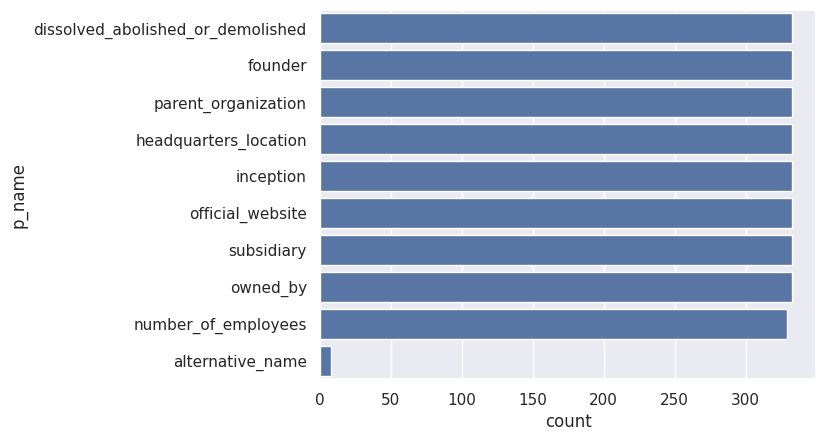

In [8]:
# Plot the distribution of p_names regarding organization slots
org_slots_dict = {
    "official_website": "P856",
    "owned_by": "P127",
    "headquarters_location": "P159",
    "dissolved_abolished_or_demolished": "P576",
    "inception": "P571",
    "founder": "P112",
    "parent_organization": "P749",
    "subsidiary": "P355",
    "number_of_employees": "P1128",
    "number_of_members": "P1129",
    "alternate_names": "P4970",
}

org_slots = [org_slots_dict[slot] for slot in org_slots_dict]
org_slots_names = [slot for slot in org_slots_dict]

org_slots_distribution = extraction[extraction["p_id"].isin(org_slots)]

# Order by the number of occurrences
org_slots_distribution = (
    org_slots_distribution.groupby("p_name").size().reset_index(name="count")
)
org_slots_distribution = org_slots_distribution.sort_values(by="count", ascending=False)

sns.barplot(x="count", y="p_name", data=org_slots_distribution)